In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../src')
from features.Pipeline import Pipeline

import librosa
import soundfile as sf
import matplotlib.pyplot as plt
import numpy as np

C:\Users\micha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
wave_pipe = Pipeline("waveform", conditions_path='../data/raw/Single-bass/examples.json')
stft_pipe = Pipeline("stft", conditions_path='../data/raw/Single-bass/examples.json')
mel_pipe = Pipeline("mel", conditions_path='../data/raw/Single-bass/examples.json')
mfcc_pipe = Pipeline("mfcc", conditions_path='../data/raw/Single-bass/examples.json')
cqt_pipe = Pipeline("cqt", conditions_path='../data/raw/Single-bass/examples.json')

# file_path = '../models/generated_samples/WPGAN_generated_audio15.wav'
file_path = '../data/raw/Single-bass/audio/bass_electronic_018-026-127.wav'
# file_path = '../data/raw/Single-piano/keyboard_acoustic_004-064-100.wav'

wave_spectro, wave_conditional_vector = wave_pipe.process(file_path)
stft_spectro, stft_wave_conditional_vector = stft_pipe.process(file_path)
mel_spectro, mel_conditional_vector = mel_pipe.process(file_path)
mfcc_spectro, mfcc_conditional_vector = mfcc_pipe.process(file_path)
cqt_spectro, cqt_conditional_vector = cqt_pipe.process(file_path)

In [20]:
# mel_conditional_vector

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [30]:
# import torch

# base_feature_vector = torch.zeros(1, 116)
# indices = [17, 105]
# base_feature_vector[0, indices] = 1


# base_feature_vector

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
         0., 0., 0., 0., 0., 0., 0., 0.]])

In [7]:
print(f'WAVE transformation result shape: {wave_spectro.shape}')
print(f'STFT transformation result shape: {stft_spectro.shape}')
print(f'MEL transformation result shape: {mel_spectro.shape}')
print(f'MFCC transformation result shape: {mfcc_spectro.shape}')
print(f'CQT transformation result shape: {cqt_spectro.shape}')

WAVE transformation result shape: torch.Size([64000])
STFT transformation result shape: torch.Size([1025, 126])
MEL transformation result shape: torch.Size([256, 128])
MFCC transformation result shape: torch.Size([20, 126])
CQT transformation result shape: torch.Size([84, 126])


In [8]:
def draw_spectro(spectro, name="Mel-Spectrogram (dB)"):
    fig, ax = plt.subplots()

    S_dB = librosa.amplitude_to_db(spectro, ref=np.min)
    img = librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=16000, ax=ax)
    fig.colorbar(img, ax=ax, format='%+2.0f dB')
    ax.set(title='Mel-spectrogram')

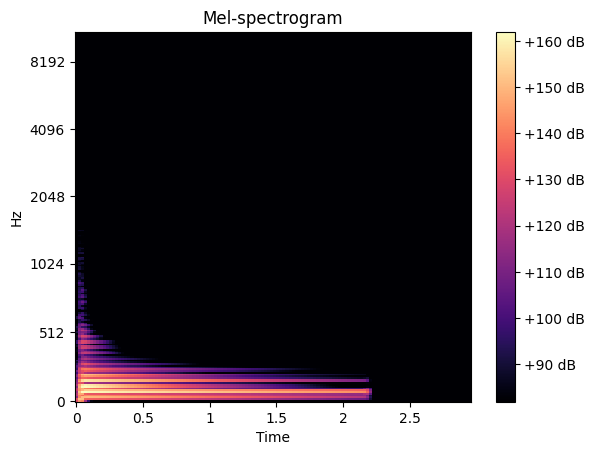

In [9]:
# draw_spectro(wave_spectro)
# draw_spectro(stft_spectro, name="Stft Spectrogram (dB)")
draw_spectro(mel_spectro, name="Mel Spectrogram (dB)")
# draw_spectro(mfcc_spectro, name="Mfcc Spectrogram (dB)")
# draw_spectro(cqt_spectro, name="Cqt Spectrogram (dB)")

In [25]:
mel_spectro.shape

torch.Size([256, 128])

In [26]:
# wave_audio_back = wave_pipe.post_process(wave_spectro)
# stft_audio_back = stft_pipe.post_process(stft_spectro)
mel_audio_back = mel_pipe.post_process(mel_spectro)
# mfcc_audio_back = mfcc_pipe.post_process(mfcc_spectro)
# cqt_audio_back = cqt_pipe.post_process(cqt_spectro)

In [27]:
# print(wave_audio_back.shape)
# print(stft_audio_back.shape)
print(mel_audio_back.shape)
# print(mfcc_audio_back.shape)
# print(cqt_audio_back.shape)

(64000,)


In [28]:
# print(wave_audio_back)
# print(stft_audio_back)
print(mel_audio_back)
# print(mfcc_audio_back)
# print(cqt_audio_back)

[-0.03324695 -0.04300834 -0.04274815 ...  0.          0.
  0.        ]


In [29]:
# sf.write('wave_process.wav', data=wave_audio_back, samplerate=wave_pipe.input_sr, subtype='PCM_24')
# sf.write('stft_process.wav', data=stft_audio_back, samplerate=stft_pipe.input_sr, subtype='PCM_24')
sf.write('mel_process.wav', data=mel_audio_back, samplerate=stft_pipe.input_sr, subtype='PCM_24')
# sf.write('mfcc_process.wav', data=mfcc_audio_back, samplerate=mfcc_pipe.input_sr, subtype='PCM_24')
# sf.write('cqt_process.wav', data=cqt_audio_back, samplerate=cqt_pipe.input_sr, subtype='PCM_24')